<a href="https://colab.research.google.com/github/ChaiwonLee/dbdtdatainsighters/blob/main/DBDT_1117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터: Predicting Churn for Bank Customers \
https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

프로젝트 이름 (Title): 은행 고객 이탈에 영향을 주는 요인

프로젝트 배경 (Background) : 세분화된 인사이트 도출로 국가별, 성별, 나이별, 신용점수에 따라 어떤 요인이 은행 고객 이탈에 영향을 주는지 연구하기 위한 프로젝트입니다.

프로젝트 목표/기대 효과 (Objective): 요인별로 분석 및 가입기간과의 관계를 탐색 해보고, 어떤 요인이 은행 이탈에 영향을 주는지 확인하고, 장기적으로 은행 고객 이탈로 인한 비용을 감소할 수 있도록 기여합니다.

프로젝트 핵심 지표: 신용점수 증가

최초의 가설: \
가설 #1: 신용점수가 높을수록 재가입할 확률이 높을 것이다. \
가설 #2:  은행 사용 기간(Tenure)이 짧을 수록 신용점수가 낮다. \
(* tenure: how many years the client uses this bank) \
가설 #3:  잔고가 부족할수록 신용점수가 낮다. \
 가설 #4:  나이가 어릴수록 신용점수가 낮다. \
가설 #5:  성별에 따라 신용점수가 달라질 것이다. \

1. 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

2. 데이터셋 불러오기

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


3. 데이터 이름 지정 :사용할 데이터의 이름 = churn

In [5]:
churn = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

4. 데이터 훑어보기

In [6]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

이상치 없음 이대로 분석 진행 \
rownumber, customerid, surname 은 분석에 필요 없으므로 제거 \
새로운데이터 churn2 생성

In [112]:
churn2=churn.iloc[:,3:]

In [11]:
churn2.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


5. 각 변수에 대한 정의 \
(출처: https://www.kaggle.com/code/simgeerek/churn-prediction-using-machine-learning) \
RowNumber: 레코드(행) 번호에 해당하며 출력에는 영향을 주지 않습니다. \
CustomerId: 임의의 값을 포함하며 고객이 은행을 떠나는 데 영향을 미치지 않습니다.\
Surname: 고객의 성은 은행을 떠나기로 결정하는 데 영향을 미치지 않습니다.\
CreditScore: 신용 점수가 높은 고객은 은행을 떠날 가능성이 적기 때문에 고객 이탈에 영향을 미칠 수 있습니다.\
Geography: 고객의 위치는 은행을 떠나는 결정에 영향을 미칠 수 있습니다.\
Gender: 고객이 은행을 떠나는 데 성별이 어떤 역할을 하는지 탐구하는 것은 흥미롭습니다.\
Age: 나이가 많은 고객은 젊은 고객보다 은행을 떠날 가능성이 적기 때문에 이것은 확실히 관련이 있습니다.\
Tenure: 고객이 은행의 고객이었던 연수를 나타냅니다. 일반적으로 나이가 많은 고객은 충성도가 더 높으며 은행을 떠날 가능성이 적습니다.\
Balance: 계좌 잔액이 높은 사람은 잔액이 적은 사람에 비해 은행을 떠날 가능성이 적기 때문에 고객 이탈을 나타내는 매우 좋은 지표이기도 합니다.\
NumOfProducts : 고객이 은행을 통해 구매한 상품의 개수를 의미합니다.\
HasCrCard: 고객이 신용카드를 가지고 있는지 여부를 나타냅니다. 신용 카드를 가진 사람은 은행을 떠날 가능성이 적기 때문에 이 열도 관련이 있습니다.\
IsActiveMember: 활성 고객은 은행을 떠날 가능성이 적습니다.\
EstimatedSalary : 잔액과 마찬가지로 급여가 낮은 사람은 급여가 높은 사람에 비해 은행을 떠날 가능성이 더 높습니다.\
Exited : 고객이 은행을 떠났는지 여부입니다. (0=No, 1=Yes)
\\

살펴보면 좋을 것 같은 데이터\
creditscore - 성별, 지리, 나이별 신용점수의 분포 \
geography \
gender \
age \
tenure - 신용점수와의 관계 / - 이탈과의 관계 / - 성별,지리,나이와의 관계 \
balance - 신용점수와의 관계 / - 이탈과의 관계 / - 성별, 지리, 나이와의 관계 \
num of products \
hascrcard \
isactivemember \
exited \

6. 몇개의 변수별로 막대그림을 그려보자

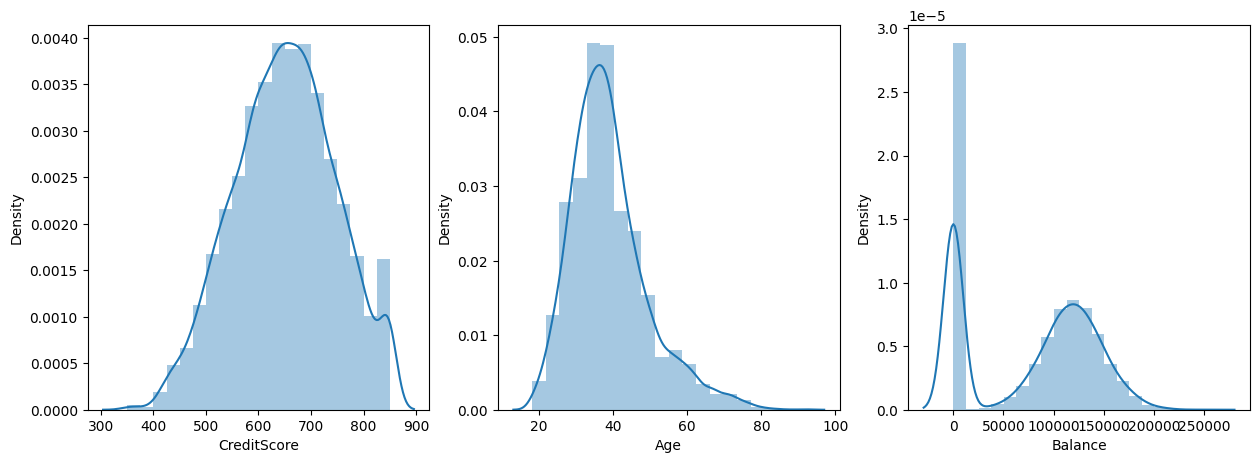

In [83]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(churn['CreditScore'], ax=ax[0], bins=20)
sns.distplot(churn['Age'],ax=ax[1], bins=20)
sns.distplot(churn['Balance'], ax=ax[2], bins=20)
plt.show()



credit score, age, balance는 정규형을 보인다 \
balance에는 0인 데이터도 상당히 많이 존재한다.

7. 몇가지 금융정보를 지리, 성별에 따른 분포로 한번 봐보자

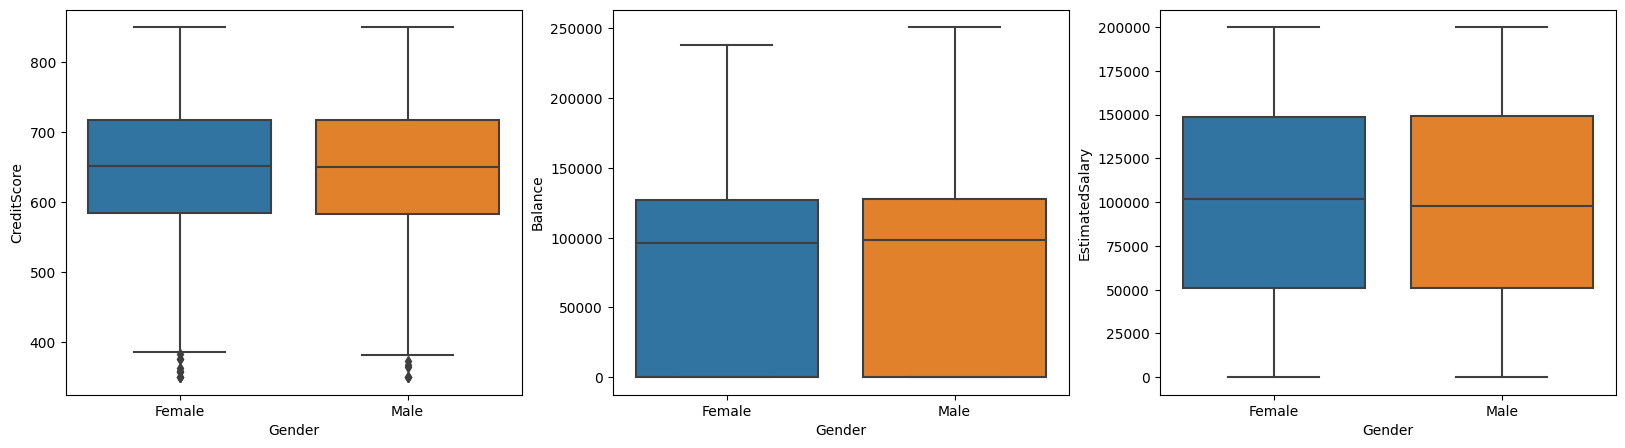

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
sns.boxplot(x="Gender", y="CreditScore", data=churn,ax=ax[0])
sns.boxplot(x="Gender", y="Balance", data=churn,ax=ax[1])
sns.boxplot(x="Gender", y="EstimatedSalary", data=churn,ax=ax[2])
plt.show()

성별에 따른 큰 차이는 보이지 않는다

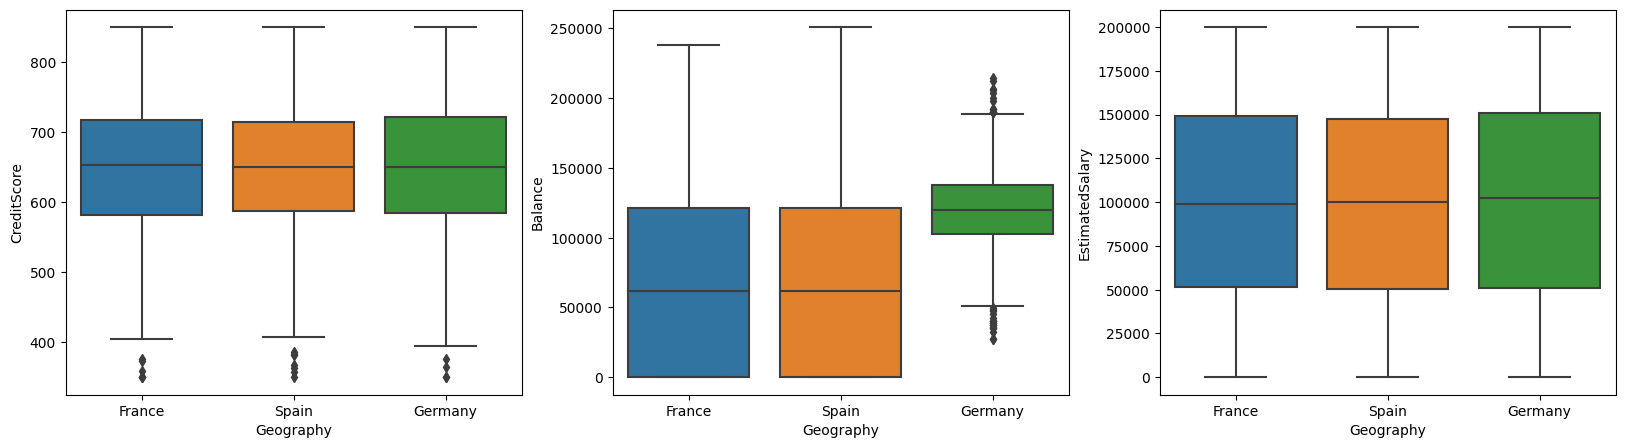

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
sns.boxplot(x="Geography", y="CreditScore", data=churn,ax=ax[0])
sns.boxplot(x="Geography", y="Balance", data=churn,ax=ax[1])
sns.boxplot(x="Geography", y="EstimatedSalary", data=churn,ax=ax[2])
plt.show()

balance의 경우 독일이 평균이 다른 나라에 비해 크고 평균 중심으로 데이터가 분포되어있다, 동시에 이상치도 꽤나 존재한다. \
다른 두 나라와는 다른 패턴

8, 변수별 상관성을 한번 봐보자

<Axes: >

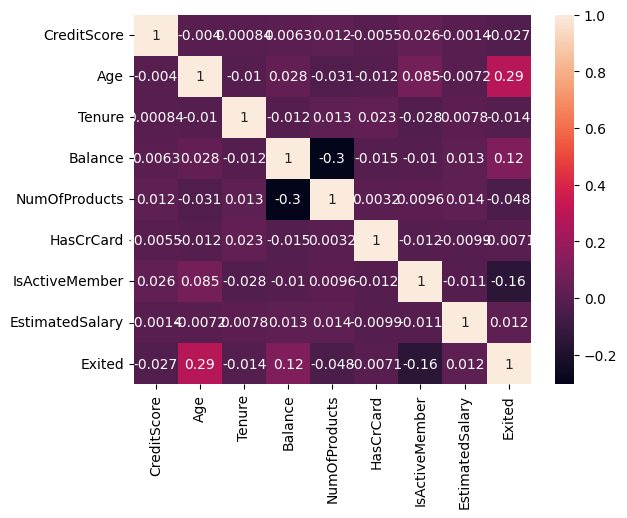

In [15]:
sns.heatmap(churn2.corr(),annot=True)

변수별 상관관계가 그렇게 커보이지는 않는다 \
exited 변수를 그나마 볼 만 하다 \
numofproduct - balance : -0.3 \
tenure-age : 0.29 \
Exited - age: 0.29 \
exited - balance : 0.12 \
exited - isactivememeber : -0.16 \

9. 이탈율을 카운트해보자

<Axes: xlabel='Exited', ylabel='count'>

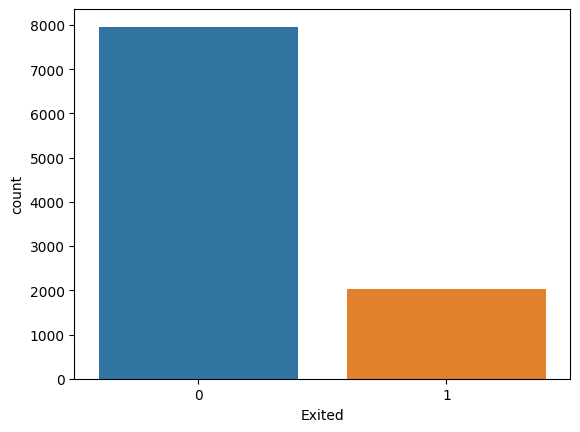

In [16]:
sns.countplot(x='Exited', data=churn2)

Exited : 고객이 은행을 떠났는지 여부입니다. (0=No, 1=Yes) \
은행을 떠나지 않은 고객이 압도적으로 많다. \
떠나는 고객은 왜 떠날까? \

10. 몇가지 변수들별로 이탈율을 카운트해보자

<Axes: xlabel='IsActiveMember', ylabel='count'>

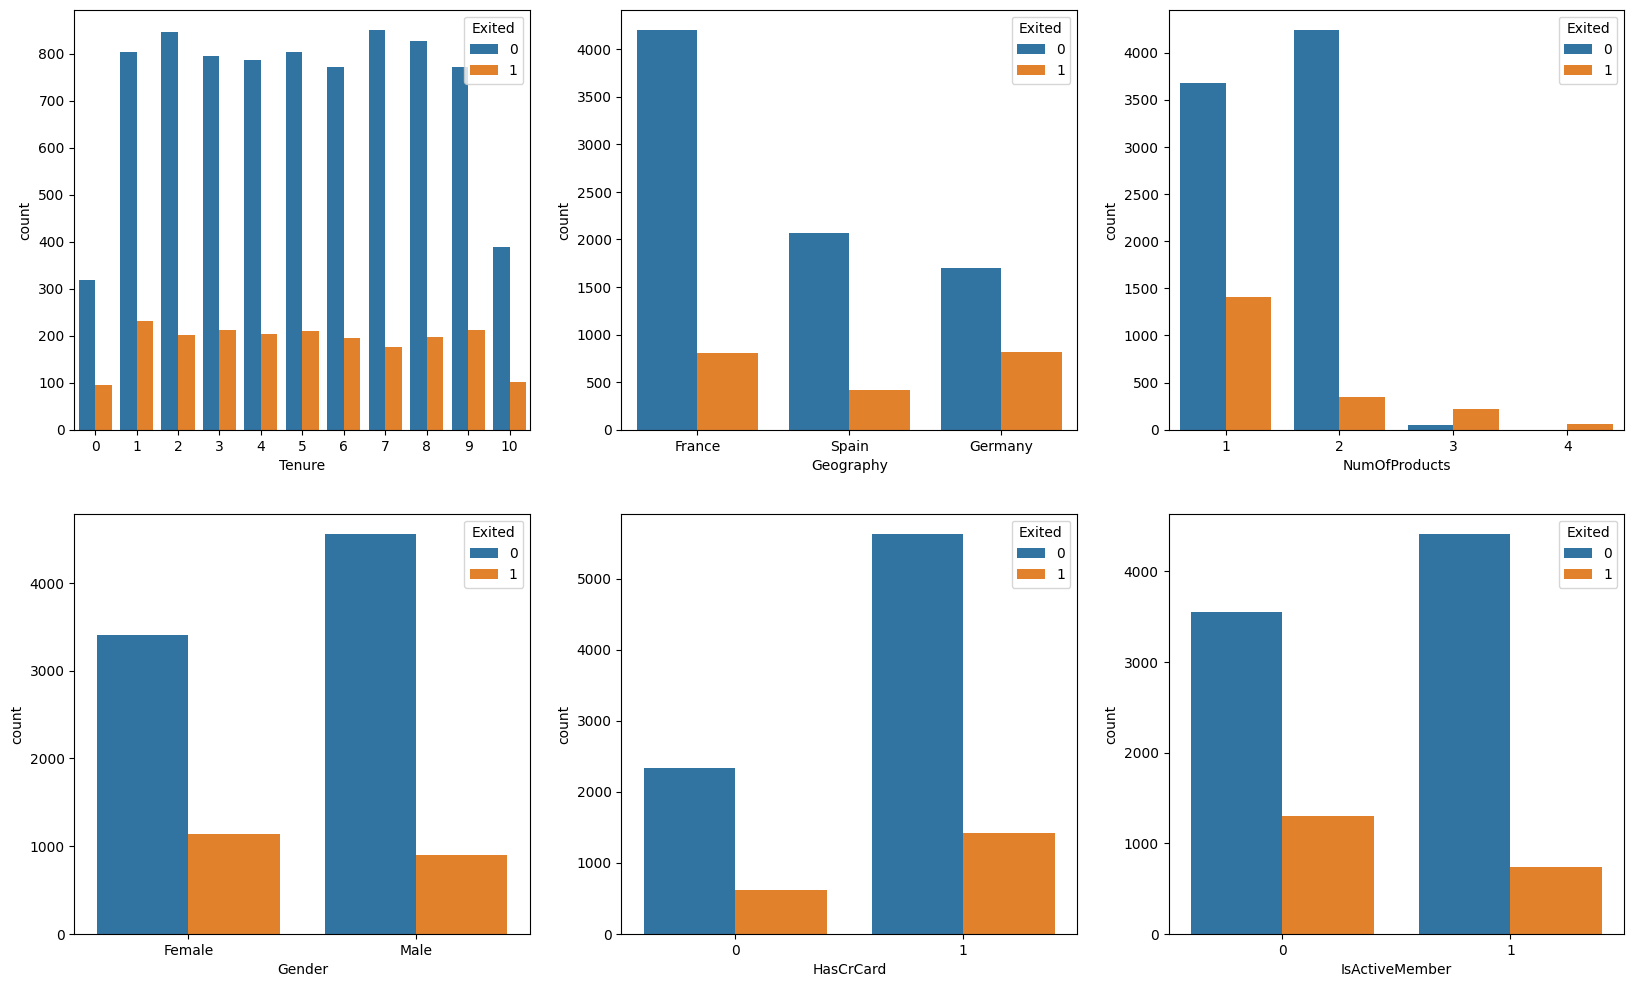

In [17]:
fig, axes = plt.subplots(2,3, figsize=(20, 12))
sns.countplot(x='Tenure', hue = 'Exited',data = churn2, ax=axes[0][0])
sns.countplot(x='Geography', hue = 'Exited',data = churn2, ax=axes[0][1])
sns.countplot(x='NumOfProducts',hue='Exited', data=churn2,  ax=axes[0][2])
sns.countplot(x='Gender', hue = 'Exited',data = churn2, ax=axes[1][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn2, ax=axes[1][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn2, ax=axes[1][2])

11. 자세히 봐보기 위해 이탈과변수들의 분할표를 만들어보겠다

In [37]:
exited_prop1 = pd.crosstab(churn["Exited"], churn['Tenure'],normalize=True)
print(exited_prop1)

Tenure      0       1       2       3       4       5       6       7   \
Exited                                                                   
0       0.0318  0.0803  0.0847  0.0796  0.0786  0.0803  0.0771  0.0851   
1       0.0095  0.0232  0.0201  0.0213  0.0203  0.0209  0.0196  0.0177   

Tenure      8       9       10  
Exited                          
0       0.0828  0.0771  0.0389  
1       0.0197  0.0213  0.0101  


가입기간 2~9 사이는 이탈을 안하는 편이라고 볼 수 있다. 비율도 비슷한 편.

In [38]:
exited_prop2 = pd.crosstab(churn["Exited"], churn['Geography'],normalize=True)
print(exited_prop2)

Geography  France  Germany   Spain
Exited                            
0          0.4204   0.1695  0.2064
1          0.0810   0.0814  0.0413


이탈을 안한다 (no=0)는 프랑스-스페인-독일 순 \
이탈한다 (yes=1)은 프랑스와 스페인이 비슷하고, 독일이 가장 작다.

In [39]:
exited_prop3 = pd.crosstab(churn["Exited"], churn['NumOfProducts'],normalize=True)
print(exited_prop3)

NumOfProducts       1       2       3      4
Exited                                      
0              0.3675  0.4242  0.0046  0.000
1              0.1409  0.0348  0.0220  0.006


보유 상품 수가 3개로 접어드는 순간 이탈안한다(no=0)의 비율이 갑자기 작아진다. \
보유상품수가 1~2개일때 이탈을 안하는 편

In [40]:
exited_prop4 = pd.crosstab(churn["Exited"], churn['Gender'],normalize=True)
print(exited_prop4)

Gender  Female    Male
Exited                
0       0.3404  0.4559
1       0.1139  0.0898


남성의 경우 이탈을 안한다 (no=0) 가 여자보다 크다.


In [41]:
exited_prop5 = pd.crosstab(churn["Exited"], churn['HasCrCard'],normalize=True)
print(exited_prop5)

HasCrCard       0       1
Exited                   
0          0.2332  0.5631
1          0.0613  0.1424


신용카드를 보유할수록 이탈을 안한다.

In [42]:
exited_prop6 = pd.crosstab(churn["Exited"], churn['IsActiveMember'],normalize=True)
print(exited_prop6)

IsActiveMember       0       1
Exited                        
0               0.3547  0.4416
1               0.1302  0.0735


현재 은행 사용 고객일수록 이탈을 안한다.

<Axes: xlabel='IsActiveMember'>

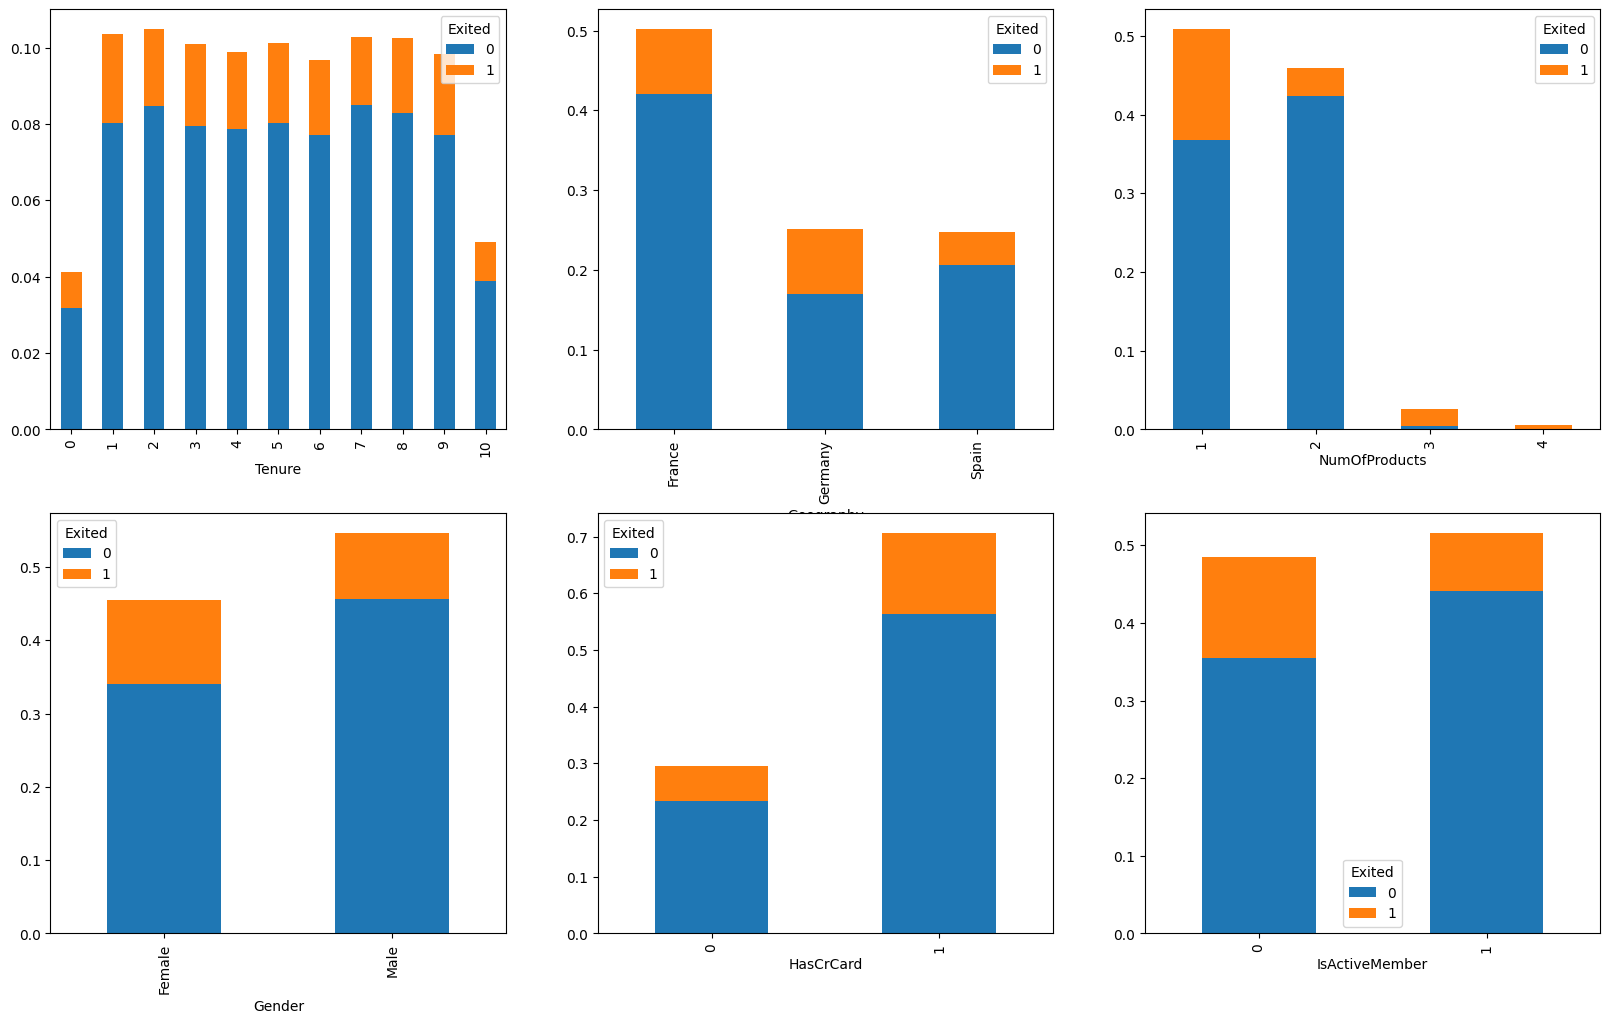

In [49]:
fig, axes = plt.subplots(2,3, figsize=(20, 12))
exited_prop1 .T.plot(kind='bar', stacked=True, ax=axes[0][0])
exited_prop2 .T.plot(kind='bar', stacked=True, ax=axes[0][1])
exited_prop3 .T.plot(kind='bar', stacked=True, ax=axes[0][2])
exited_prop4 .T.plot(kind='bar', stacked=True, ax=axes[1][0])
exited_prop5 .T.plot(kind='bar', stacked=True, ax=axes[1][1])
exited_prop6 .T.plot(kind='bar', stacked=True, ax=axes[1][2])

종합:\
독일의 가입자수 대비 이탈이 가장 많다 \
상품개수가 1개 혹은 2개까지일 때 이탈이 적다. 특히 2개일때 적다.\
남성이 여성보다 이탈이 적다 \
은행거래가 있는 고객이 이탈이 적다 \

가입기간, 신용가드보유여부 생략

11. 위와 같은 내용을 바탕으로 수정된 가설을 다시 한번 살펴보자.(중간에 가설을 한번 수정했습니다) \

가설 #1
• 귀무 가설(H0): 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.
• 대립 가설(H1): 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

가설 #2
• 귀무 가설(H0): 보유한 금융상품 수에 따른 신용점수에 차이가 없다
• 대립 가설(H1): 보유한 금융상품 수에 따른 신용점수에 차이가 없다


가설 #3
• 귀무 가설(H0): 잔고에 따른 신용점수에 차이가 없다
• 대립 가설(H1): 잔고에 따른 신용점수에 차이가 있다

가설 #4
• 귀무 가설(H0): 성별에 따른 신용점수에 차이가 없다
• 대립 가설(H1): 성별에 따른 신용점수에 차이가 있다

가설#5
• 귀무 가설(H0): 성별에 따른 이탈율 차이가 없다
• 대립 가설(H1): 성별에 따른 이탈율 차이가 있다.

12.가설별로 테스트를 한번 해보자

In [59]:
# 가설 1
# • 귀무 가설(H0): 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.
# • 대립 가설(H1): 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

import numpy as np
import scipy.stats as stats

exited_group = churn2[churn2['Exited'] == 1]
not_exited_group = churn2[churn2['Exited'] == 0]

credit_scores_exited_O = exited_group['CreditScore']
credit_scores_exited_X = not_exited_group['CreditScore']
t_statistic_1,p_value_1 = stats.ttest_ind(credit_scores_exited_O, credit_scores_exited_X)

# 결과 출력
print(p_value_1)
if p_value_1 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이는 없다.")



0.006738213892192373
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.


In [60]:
# 가설 2
# • 귀무 가설(H0): 보유한 금융상품 수에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 보유한 금융상품 수에 따른 신용점수에 차이가 있다.

# 분산분석 (ANOVA, Analysis of Variance)

# 각 그룹의 데이터 준비
group_1_product = churn2[churn2['NumOfProducts'] == 1]['CreditScore']
group_2_product = churn2[churn2['NumOfProducts'] == 2]['CreditScore']
group_3_product = churn2[churn2['NumOfProducts'] == 3]['CreditScore']
group_4_product = churn2[churn2['NumOfProducts'] == 4]['CreditScore']

# ANOVA 수행
f_statistic_2, p_value_2 = stats.f_oneway(group_1_product, group_2_product, group_3_product, group_4_product)

# 결과 출력
print(f"t-statistic: {f_statistic_2}, p-value: {p_value_2}")

if p_value_2 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 없다.")

t-statistic: 0.8864761142070923, p-value: 0.4472040985916901
귀무가설(H0)을 기각하지 않습니다. -> 보유한 금융상품 수에 따른 신용점수에 차이가 없다.


In [61]:
# 가설 3
# • 귀무 가설(H0): 잔고에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 잔고에 따른 신용점수에 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 평균(mean) 계산
balace_mean_value = np.mean(churn2['Balance'])
# 중앙값(median) 계산
balace_median_value = np.median(churn2['Balance'])

# 두 그룹의 데이터 준비 (예: 잔고가 낮은 그룹과 잔고가 높은 그룹)
group_low_balance = churn2[churn2['Balance'] <= balace_mean_value]['CreditScore']
group_high_balance = churn2[churn2['Balance'] > balace_mean_value]['CreditScore']

# 독립표본 t-검정 수행
t_statistic_3, p_value_3 = stats.ttest_ind(group_low_balance, group_high_balance)

# 결과 출력
print(f"t-statistic: {t_statistic_3}, p-value: {p_value_3}")

if p_value_3 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 잔고에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 잔고에 따른 신용점수에 차이가 없다.")

t-statistic: -0.8323566395733117, p-value: 0.4052275499353919
귀무가설(H0)을 기각하지 않습니다. -> 잔고에 따른 신용점수에 차이가 없다.


In [73]:
# 가설 4
# • 귀무 가설(H0): 성별에 따른 신용점수에 차이가 없다.
# • 대립 가설(H1): 성별에 따른 신용점수에 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 남성과 여성 그룹의 데이터 준비

group_male = churn[churn['Gender'] == 'Male']['CreditScore']
group_female = churn[churn['Gender'] == 'Female']['CreditScore']

# 독립표본 t-검정 수행
t_statistic_4, p_value_4 = stats.ttest_ind(group_male, group_female)

# 결과 출력
print(f"t-statistic: {t_statistic_4}, p-value: {p_value_4}")

if p_value_4 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 신용점수에 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 신용점수에 차이가 없다.")

t-statistic: -0.2856346098463999, p-value: 0.7751639097068665
귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 신용점수에 차이가 없다.


In [72]:
# 가설 5
# • 귀무 가설(H0): 성별에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 성별에 따른 이탈율 차이가 있다.

# 카이제곱 검정 (Chi-square test)

# 교차표 생성
gender_contingency_table = pd.crosstab(churn2['Gender'], churn2['Exited'])

# 카이제곱 검정 수행
chi2_stat_gender, p_value_5, _, _ = stats.chi2_contingency(gender_contingency_table)


# 결과 출력
print(f"Chi-squared statistic: {chi2_stat_gender}, p-value: {p_value_5}")

if p_value_5 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 성별에 따른 이탈율 차이가 없다.")

Chi-squared statistic: 112.91857062096116, p-value: 2.2482100097131755e-26
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 성별에 따른 이탈율 차이가 있다.


In [74]:
# 가설 6
# • 귀무 가설(H0): 지역에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 지역에 따른 이탈율 차이가 있다.

# 카이제곱 검정 (Chi-square test)

# 교차표 생성
geo_contingency_table = pd.crosstab(churn['Geography'], churn['Exited'])

# 카이제곱 검정 수행
chi2_stat_geo, p_value_6, _, _ = stats.chi2_contingency(geo_contingency_table)


# 결과 출력
print(f"Chi-squared statistic: {chi2_stat_geo}, p-value: {p_value_6}")

if p_value_6 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 지역에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 지역에 따른 이탈율 차이가 없다.")

Chi-squared statistic: 301.25533682434536, p-value: 3.8303176053541544e-66
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 지역에 따른 이탈율 차이가 있다.


In [75]:
# 가설 7
# • 귀무 가설(H0): 추정 연봉에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 추정 연봉에 따른 이탈율 차이가 있다.

# 이항검정 (Binomial Test)
from statsmodels.stats.proportion import proportions_ztest

# 평균(mean) 계산
salary_mean_value = np.mean(churn['EstimatedSalary'])
# 중앙값(median) 계산
salary_median_value = np.median(churn['EstimatedSalary'])

# 추정 연봉이 80000 미만인 그룹과 이상인 그룹 간의 이항검정 수행
group_low_salary = churn[churn['EstimatedSalary'] <= salary_mean_value]['Exited']
group_high_salary = churn[churn['EstimatedSalary'] > salary_mean_value]['Exited']

count_low_salary = group_low_salary.sum()  # 이탈한 경우의 수
nobs_low_salary = len(group_low_salary)     # 전체 샘플 수

count_high_salary = group_high_salary.sum()  # 이탈한 경우의 수
nobs_high_salary = len(group_high_salary)     # 전체 샘플 수

# 이항검정 수행
z_stat_salary, p_value_7 = proportions_ztest([count_low_salary, count_high_salary], [nobs_low_salary, nobs_high_salary])

# 결과 출력
print(f"Z-statistic: {z_stat_salary}, p-value: {p_value_7}")

if p_value_7 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 추정 연봉에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 추정 연봉에 따른 이탈율 차이가 없다.")

Z-statistic: -1.0961741455881737, p-value: 0.2730025717756891
귀무가설(H0)을 기각하지 않습니다. -> 추정 연봉에 따른 이탈율 차이가 없다.


In [76]:
# 가설 8
# • 귀무 가설(H0): 신용카드 소지 여부에 따른 신용점수 차이가 없다.
# • 대립 가설(H1): 신용카드 소지 여부에 따른 신용점수 차이가 있다.

# 독립표본 t-검정 (Independent Samples t-test)

# 두 그룹 간의 독립표본 t-검정 수행
group_has_card = churn[churn['HasCrCard'] == 1]['CreditScore']
group_no_card = churn[churn['HasCrCard'] == 0]['CreditScore']

t_statistic_8, p_value_8 = stats.ttest_ind(group_has_card, group_no_card)

# 결과 출력
print(f"t-statistic: {t_statistic_8}, p-value: {p_value_8}")

if p_value_8 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 없다.")

t-statistic: -0.5458017530613642, p-value: 0.5852143953187045
귀무가설(H0)을 기각하지 않습니다. -> 신용카드 소지 여부에 따른 신용점수 차이가 없다.


In [77]:
# 가설 9
# • 귀무 가설(H0): 나이에 따른 이탈율 차이가 없다.
# • 대립 가설(H1): 나이에 따른 이탈율 차이가 있다.

# ANOVA (Analysis of Variance)

# 나이에 따른 그룹 간의 ANOVA 수행
group_ages = [churn[churn['Age'] == age]['Exited'] for age in churn['Age']]
f_statistic_age, p_value_9 = stats.f_oneway(*group_ages)

# 결과 출력
print(f"t-statistic: {f_statistic_age}, p-value: {p_value_9}")

if p_value_9 < 0.05:  # 유의수준을 0.05로 설정
    print("귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 나이에 따른 이탈율 차이가 있다.")
else:
    print("귀무가설(H0)을 기각하지 않습니다. -> 나이에 따른 이탈율 차이가 없다.")

t-statistic: 33.0818888687036, p-value: 0.0
귀무가설(H0)을 기각합니다. 대립가설(H1)을 채택합니다. -> 나이에 따른 이탈율 차이가 있다.


가설 결과

이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.\
성별에 따른 이탈율 차이가 있다.\
지역에 따른 이탈율 차이가 있다.\
나이에 따른 이탈율 차이가 있다.

<Axes: xlabel='CreditScoreGroup', ylabel='count'>

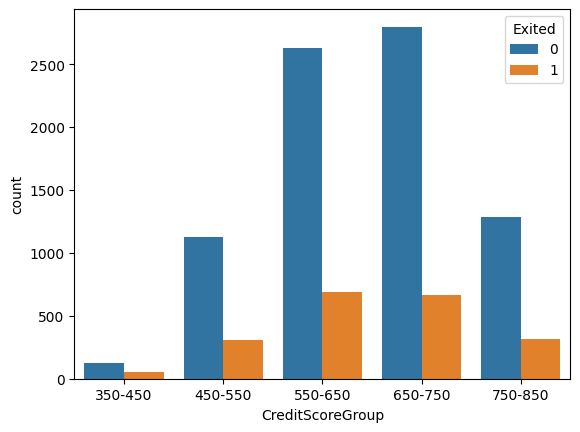

In [78]:

# 이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.

churn['CreditScoreGroup'] = pd.cut(churn['CreditScore'], bins=[350, 450, 550, 650, 750, 850], labels=['350-450', '450-550', '550-650', '650-750', '750-850'])

sns.countplot(x='CreditScoreGroup', data=churn, hue='Exited')

신용점수가 550~750점대인 고객들의 이탈율이 높은 것으로 보입니다.

Text(0, 0.5, 'Churn Percentage')

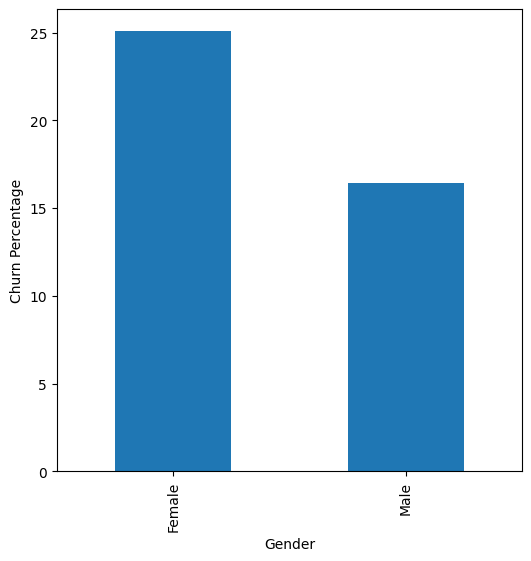

In [79]:

# 성별에 따른 이탈율 차이가 있다.

plt.rcParams['figure.figsize'] = (6,6)
(churn.groupby('Gender')['Exited'].mean()*100).plot(kind='bar')
plt.ylabel('Churn Percentage')

전반적으로 여성의 이탈율이 높은 것으로 보입니다.

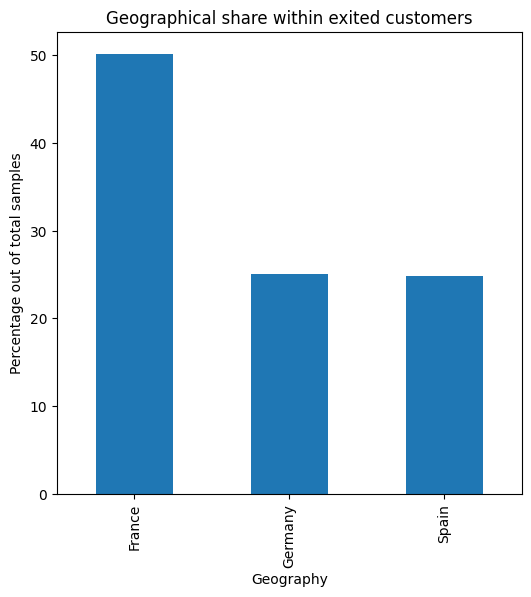

In [80]:

# 지역에 따른 이탈율 차이가 있다.

plt.figure(figsize = (6,6))
(churn['Geography'].value_counts()/churn['Geography'].value_counts().sum()*100).plot(kind='bar')
plt.ylabel('Percentage out of total samples')
plt.xlabel('Geography')
plt.title('Geographical share within exited customers');

고객 중 약 50%는 프랑스 출신입니다. 독일과 스페인은 거의 동일한 25%의 점유율을 가지고 있습니다.

Text(0.5, 1.0, 'Churn by geography')

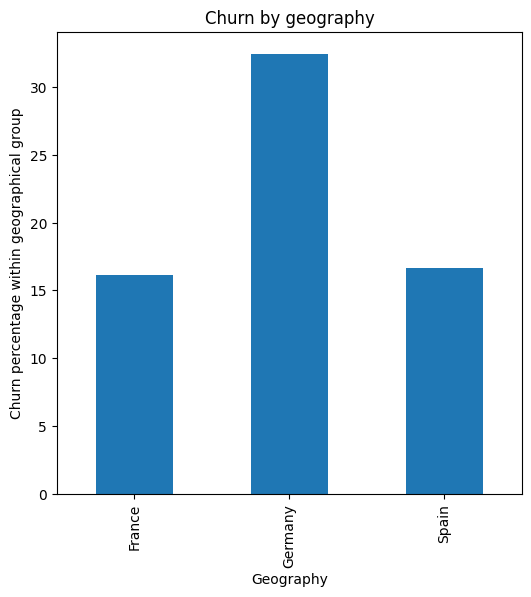

In [81]:

ct = pd.crosstab(churn['Exited'], churn['Geography'])
ct

plt.figure(figsize=(6,6))
(ct.loc[1] * 100.0 / ct.sum()).plot(x=ct.index, y=ct.values, kind='bar')
plt.ylabel('Churn percentage within geographical group')
plt.title('Churn by geography')

독일 고객은 가장 높은 이탈 비율을 보입니다. 프랑스와 스페인 고객의 경우 이탈 비율이 거의 동일한 것으로 보입니다.

<Axes: xlabel='Exited', ylabel='Age'>

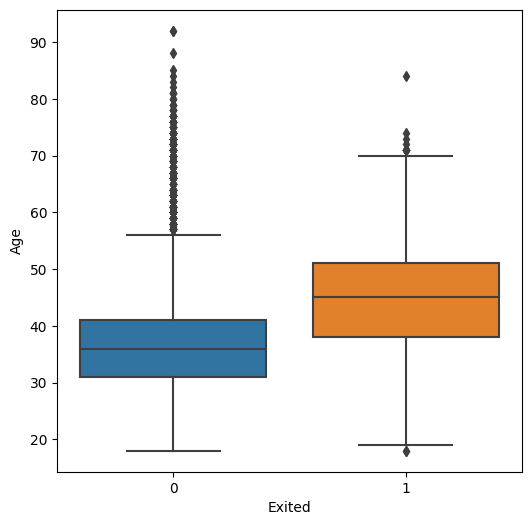

In [82]:

# 나이에 따른 이탈율 차이가 있다.

plt.figure(figsize=(6,6))
sns.boxplot(x='Exited', y='Age', data=churn)

40-50세 연령대의 고객이 가장 이탈할 가능성이 높습니다. 30-40세 연령대의 젊은 고객들은 유지될 가능성이 더 높습니다.

시각화를 통해 살펴본 내용을 가설검증을 통해 다시 한번 확인할 수 있었다.\

⬛ 분석 결과 요약 (Key Result + Summarization)\

이탈한 자와 유지한 자 사이의 신용점수의 차이가 있다.\
성별에 따른 이탈율 차이가 있다.\
지역에 따른 이탈율 차이가 있다.\
나이에 따른 이탈율 차이가 있다.\
신용점수가 550~750점대인 고객들의 이탈율이 높은 것으로 보입니다.\
전반적으로 여성의 이탈율이 높은 것으로 보입니다.\
고객 중 약 50%는 프랑스 출신입니다. 독일과 스페인은 거의 동일한 25%의 점유율을 가지고 있습니다. 독일 고객은 가장 높은 이탈 비율을 보입니다. 프랑스와 스페인 고객의 경우 이탈 비율이 거의 동일한 것으로 보입니다.
\40-50세 연령대의 고객이 가장 이탈할 가능성이 높습니다. 30-40세 연령대의 젊은 고객들은 유지될 가능성이 더 높습니다.

13. 이어서 예측을 한번 해보도록 하자 \

In [156]:
churn = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

In [157]:
churn2=churn.iloc[:,3:]

In [158]:
churn2.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [159]:
gender_data=pd.get_dummies(churn2['Gender'],drop_first=True,dtype=float)
geography_data=pd.get_dummies(churn2['Geography'],dtype=float)

In [160]:
churn2 = pd.concat([churn2, gender_data, geography_data], axis = 1)
print(churn2.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Male', 'France', 'Germany', 'Spain'],
      dtype='object')


In [161]:
churn2.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1.0,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1.0,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.0,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0,0.0
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0.0,1.0,0.0,0.0


In [162]:
churn2.drop(['Gender','Geography'], axis = 1, inplace = True)
churn2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,1.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,0.0,1.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,1.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,1.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,0.0,1.0


In [212]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import sklearn.metrics as metrics

훈련데이터와 테스트데이터를 생성하였다.\
x는 훈련에 사용하고, y는 예측될 데이터이다.

In [175]:
feature_columns = churn2.columns.difference(["Exited"])
x = churn2[feature_columns]
y = churn2["Exited"]

In [176]:
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(7000, 12) (3000, 12) (7000,) (3000,)


In [218]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [219]:
model.coef_

array([[ 4.37528960e-02,  3.47018502e-06, -4.98401585e-03,
        -1.55394909e-06, -8.42640591e-04,  9.64169840e-04,
        -1.56294424e-04, -1.36324411e-03, -1.03341535e-03,
        -4.61851188e-04, -3.15412052e-04, -1.35168653e-03]])

In [220]:
model.intercept_

array([-0.00019388])

In [223]:
y_pred=model.predict(train_x)

In [226]:
acc=accuracy_score(train_y,y_pred)
print('accuracy=',acc)

accuracy= 0.789


In [231]:
import pandas as pd
tab = pd.crosstab(train_y, y_pred)
tab

col_0,0,1
Exited,,
0,5443,131
1,1346,80


In [233]:
acc = (tab.iloc[0,0] + tab.iloc[1,1]) / len(train_y)
print('accuracy =', acc)

accuracy = 0.789


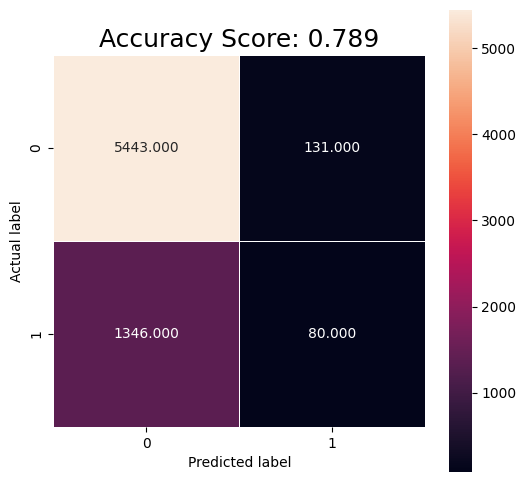

In [235]:
plt.figure(figsize=(6,6)) # chart size
sns.heatmap(tab, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 18)
plt.show()

In [236]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      2389
           1       0.20      0.03      0.06       611

    accuracy                           0.78      3000
   macro avg       0.50      0.50      0.47      3000
weighted avg       0.68      0.78      0.71      3000



새로운 가입자가 이탈한다, 이탈안한다 분류하는 모델의 성능은 78%, 성능이 그리 좋지는 않다\
정밀도 : 80% \
재현율 : 97% \


In [183]:
model = sm.Logit(train_y, train_x)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.429636
         Iterations 6


In [237]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.1501
Time:                        16:12:17   Log-Likelihood:                -3007.5
converged:                       True   LL-Null:                       -3538.6
Covariance Type:            nonrobust   LLR p-value:                7.774e-221
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0714      0.003     23.423      0.000       0.065       0.077
Balance          2.494e-06   6.11e-07      4.081      0.000     1.3e-06    3.69e-06
CreditScore        -0.0007      0.000     -2.164      0.030      -0.001   -6.81e-05
EstimatedSalary   2.17e-07   5.69e-07      0.381      0.703   -8.98e-07    1.33e-06
France             -3.3444      0.290    -11.541      0.000      -3.912      -2.776
Germany            -2.5423      0.300     -8.471      0.000      -3.130      -1.954
HasCrCard          -0.0169      0.071     -0.239      0.811      -0.156       0.122
IsActiveMember     -1.0333      0.068    -15.086      0.000      -1.168      -0.899
Male               -0.5240      0.065     -8.053      0.000      -0.651      -0.396
NumOfProducts      -0.1049      0.056     -1.880      0.060      -0.214       0.004
Spain              -3.2562      0.294    -11.058      0.000      -3.833      -2.679
Tenure             -0.0107      0.011     -0.958      0.338      -0.033       0.011
===================================================================================
"""

In [238]:
results.params

Age                7.144530e-02
Balance            2.493712e-06
CreditScore       -7.234843e-04
EstimatedSalary    2.169969e-07
France            -3.344429e+00
Germany           -2.542252e+00
HasCrCard         -1.694917e-02
IsActiveMember    -1.033328e+00
Male              -5.239632e-01
NumOfProducts     -1.049381e-01
Spain             -3.256214e+00
Tenure            -1.074503e-02
dtype: float64

In [239]:
np.exp(results.params)

Age                1.074059
Balance            1.000002
CreditScore        0.999277
EstimatedSalary    1.000000
France             0.035280
Germany            0.078689
HasCrCard          0.983194
IsActiveMember     0.355821
Male               0.592169
NumOfProducts      0.900380
Spain              0.038534
Tenure             0.989312
dtype: float64

나이가 증가할수록 이탈할 확률 1.07 \
신용점수가 증가할수록 이탈할 확률 0.99\
신용카드를 가질수록 이탈할 확률 0.98\
남성일 경우 이탈할 확률 0.5\
독일인일 경우 이탈학 확률 0.07\
가입기간이 증가할수록 이탈할 확률 0.98 \
등등....

In [240]:
pred_y = results.predict(test_x)
pred_y

6973    0.142489
4153    0.690686
1101    0.073822
5076    0.181572
7496    0.258122
          ...   
9854    0.120147
8639    0.026669
4974    0.369160
1350    0.146751
6527    0.208082
Length: 3000, dtype: float64

In [241]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

pred_Y = cut_off(pred_y, 0.5)
pred_Y

6973    0
4153    1
1101    0
5076    0
7496    0
       ..
9854    0
8639    0
4974    0
1350    0
6527    0
Length: 3000, dtype: int64

In [245]:
# confusion matrix (분류 표를 나타낸 행렬)

cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[2305   84]
 [ 487  124]]


In [246]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
	return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

acc(cfmat)

0.8096666666666666

In [247]:
# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
	pred_Y = cut_off(pred_y,i)
	cfmat = confusion_matrix(test_y,pred_Y)
	table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.203667
0.1,0.481667
0.2,0.699667
0.3,0.785667
0.4,0.801333
0.5,0.809667
0.6,0.810667
0.7,0.802333
0.8,0.796000


AUC: 0.7730953175321424


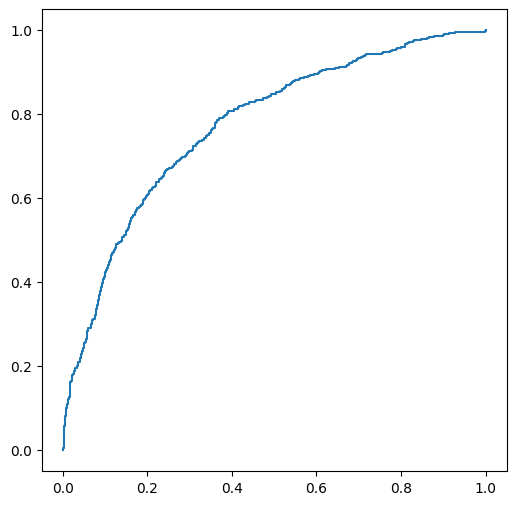

In [248]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)